In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [3]:
directory = ('/Users/mayabridgman/Documents/mri-dataset/Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(directory, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

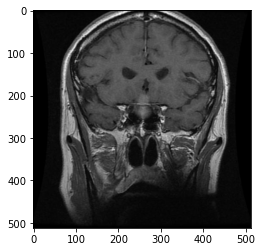

In [5]:
plt.imshow(img_array)

In [6]:
img_array.shapeimg

(512, 512, 3)

In [48]:
for i in range(4):
    print(i)

0
1
2
3


Text(0.5, 1.0, 'glioma')

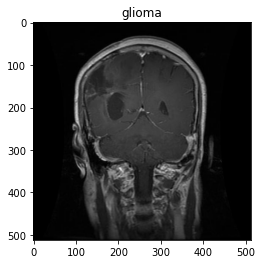

In [6]:
img1 = cv2.imread(directory+'/glioma/Tr-gl_0010.jpg')

plt.imshow(img1)
plt.title(categories[0])

Text(0.5, 1.0, 'meningioma')

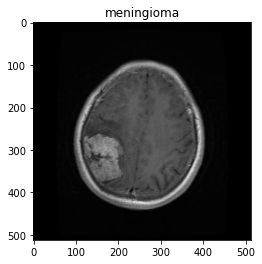

In [9]:
img2 = cv2.imread(directory+'/meningioma/Tr-me_0010.jpg')

plt.imshow(img2)
plt.title(categories[1])

Text(0.5, 1.0, 'notumor')

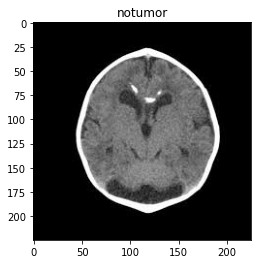

In [10]:
img3 = cv2.imread(directory+'/notumor/Tr-no_0010.jpg')

plt.imshow(img3)
plt.title(categories[2])

Text(0.5, 1.0, 'pituitary')

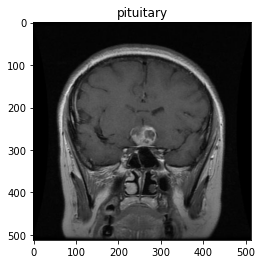

In [11]:
img4 = cv2.imread(directory+'/pituitary/Tr-pi_0010.jpg')

plt.imshow(img4)
plt.title(categories[3])

In [ ]:
#only shows last image path now for some reason, was working before
images_path = ['/glioma/Tr-gl_0010.jpg', '/meningioma/Tr-me_0010.jpg', '/notumor/Tr-no_0010.jpg', '/pituitary/Tr-pi_0010.jpg']

plt.figure(figsize=(20, 16))
for i in range(4):
    print(i)
    print(directory+images_path[0])
    img = cv2.imread(directory + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])
  

In [44]:
model = Sequential()

#convolutional neural network layer 1
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#convolutional neural network layer 2
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#dropout prevents overfitting of neural networks by randomly disabling neurons and their connections
#dense layers are fully connected layers, which means each neurone is connected to those in the next layer
model.add(Dense(units= 252, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=252, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='softmax'))

#optimiser changes the weights of the neurones to reduce loss (erorr) and increase the neural network's accuracy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)

#it is necessary to compile the model layers in order to train and test the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ['categorical_accuracy'])

In [5]:
train_gen = ImageDataGenerator(rescale=1./255, featurewise_center=False, featurewise_std_normalization=False, samplewise_center=False,  
samplewise_std_normalization=False, zca_whitening=False,  rotation_range=0, zoom_range = 0,  
width_shift_range=0, height_shift_range=0, horizontal_flip=True, vertical_flip=False)

In [6]:

test_gen = ImageDataGenerator(rescale=1./255, featurewise_center=False, featurewise_std_normalization=False, samplewise_center=False, 
samplewise_std_normalization=False, zca_whitening=False, rotation_range=0, zoom_range = 0,
width_shift_range=0, height_shift_range=0, horizontal_flip=True, vertical_flip=False)

In [7]:
train = train_gen.flow_from_directory('/Users/mayabridgman/Documents/mri-dataset/Training', target_size=(64,64),
batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = test_gen.flow_from_directory('/Users/mayabridgman/Documents/mri-dataset/Testing', target_size=(64,64),
batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
#stop training (epochs) if model does not continue to improve (if loss increases)
#create callbacks which reduce the learning rate to fine-tune the accuracy of the trained model
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

history1 = model.fit(train, steps_per_epoch=5712//32, epochs=10, validation_data=test, validation_steps= 1311//32, callbacks=[model_es, model_rlr])

2022-12-27 13:16:02.833419: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 137 of 179
2022-12-27 13:16:05.664305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 178 steps, validate for 40 steps
Epoch 1/10


2022-12-27 13:16:17.192754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 179
2022-12-27 13:16:19.529471: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 96s 538ms/step - loss: 0.7389 - categorical_accuracy: 0.7454 - val_loss: 5.2125 - val_categorical_accuracy: 0.2305
Epoch 2/10


2022-12-27 13:17:51.537933: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 140 of 179
2022-12-27 13:17:54.179569: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 519ms/step - loss: 0.4462 - categorical_accuracy: 0.8368 - val_loss: 7.5625 - val_categorical_accuracy: 0.2453
Epoch 3/10


2022-12-27 13:19:23.937528: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 134 of 179
2022-12-27 13:19:27.019165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 515ms/step - loss: 0.3025 - categorical_accuracy: 0.8905 - val_loss: 0.8754 - val_categorical_accuracy: 0.7297
Epoch 4/10


2022-12-27 13:20:55.578313: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2022-12-27 13:20:58.112715: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 510ms/step - loss: 0.2441 - categorical_accuracy: 0.9079 - val_loss: 0.3849 - val_categorical_accuracy: 0.8570
Epoch 5/10


2022-12-27 13:22:26.367652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2022-12-27 13:22:29.187212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 99s 557ms/step - loss: 0.1791 - categorical_accuracy: 0.9357 - val_loss: 0.2082 - val_categorical_accuracy: 0.9266
Epoch 6/10


2022-12-27 13:24:05.494005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 143 of 179
2022-12-27 13:24:08.014483: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 513ms/step - loss: 0.1536 - categorical_accuracy: 0.9440 - val_loss: 0.3995 - val_categorical_accuracy: 0.8664
Epoch 7/10


2022-12-27 13:25:36.914306: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 138 of 179
2022-12-27 13:25:39.780040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 95s 535ms/step - loss: 0.1080 - categorical_accuracy: 0.9625 - val_loss: 0.1603 - val_categorical_accuracy: 0.9477
Epoch 8/10


2022-12-27 13:27:12.142187: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2022-12-27 13:27:14.944770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 96s 537ms/step - loss: 0.1014 - categorical_accuracy: 0.9674 - val_loss: 0.1469 - val_categorical_accuracy: 0.9531
Epoch 9/10


2022-12-27 13:28:47.689316: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 138 of 179
2022-12-27 13:28:50.519505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 94s 530ms/step - loss: 0.0719 - categorical_accuracy: 0.9757 - val_loss: 0.2951 - val_categorical_accuracy: 0.9125
Epoch 10/10


2022-12-27 13:30:22.066355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 140 of 179
2022-12-27 13:30:24.713895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 517ms/step - loss: 0.0512 - categorical_accuracy: 0.9812 - val_loss: 0.1403 - val_categorical_accuracy: 0.9508


In [13]:
history1.history['categorical_accuracy']

[0.74542254,
 0.83679575,
 0.890493,
 0.9079225,
 0.93573946,
 0.9440141,
 0.9625,
 0.9674296,
 0.97570425,
 0.98116195]

([<matplotlib.axis.XTick at 0x7fb0e8174e10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

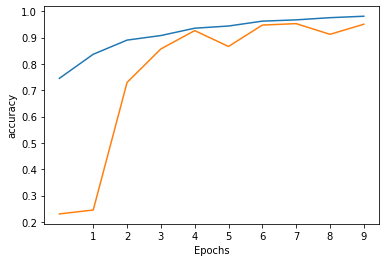

In [24]:
plt.plot(history1.history['categorical_accuracy'])
plt.plot(history1.history['val_categorical_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.xticks(range(1,10))

In [36]:
history2 = model.fit(train, steps_per_epoch=5712//32, epochs=20, validation_data=test, validation_steps= 1311//32, callbacks=[model_es, model_rlr])

2022-12-30 16:25:54.680511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2022-12-30 16:25:57.362524: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 178 steps, validate for 40 steps
Epoch 1/20


2022-12-30 16:26:07.582887: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 145 of 179
2022-12-30 16:26:10.039203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 90s 505ms/step - loss: 0.0787 - categorical_accuracy: 0.9736 - val_loss: 0.1392 - val_categorical_accuracy: 0.9484
Epoch 2/20


2022-12-30 16:27:37.467238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2022-12-30 16:27:40.336288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 511ms/step - loss: 0.0647 - categorical_accuracy: 0.9794 - val_loss: 0.3373 - val_categorical_accuracy: 0.9125
Epoch 3/20


2022-12-30 16:29:08.455643: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2022-12-30 16:29:11.128310: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 514ms/step - loss: 0.0605 - categorical_accuracy: 0.9801 - val_loss: 0.2395 - val_categorical_accuracy: 0.9414
Epoch 4/20


2022-12-30 16:30:39.955457: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 143 of 179
2022-12-30 16:30:42.589315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 510ms/step - loss: 0.0461 - categorical_accuracy: 0.9854 - val_loss: 0.1495 - val_categorical_accuracy: 0.9586
Epoch 5/20


2022-12-30 16:32:10.629252: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 138 of 179
2022-12-30 16:32:13.646424: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 94s 525ms/step - loss: 0.0404 - categorical_accuracy: 0.9875 - val_loss: 0.2526 - val_categorical_accuracy: 0.9258
Epoch 6/20


2022-12-30 16:33:44.171007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 152 of 179
2022-12-30 16:33:45.998079: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 510ms/step - loss: 0.0547 - categorical_accuracy: 0.9833 - val_loss: 0.0800 - val_categorical_accuracy: 0.9734
Epoch 7/20


2022-12-30 16:35:14.898707: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 143 of 179
2022-12-30 16:35:17.648327: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 510ms/step - loss: 0.0361 - categorical_accuracy: 0.9884 - val_loss: 0.0710 - val_categorical_accuracy: 0.9781
Epoch 8/20


2022-12-30 16:36:45.624457: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 145 of 179
2022-12-30 16:36:48.171713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 509ms/step - loss: 0.0435 - categorical_accuracy: 0.9861 - val_loss: 0.0737 - val_categorical_accuracy: 0.9828
Epoch 9/20


2022-12-30 16:38:16.159931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2022-12-30 16:38:18.872415: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 519ms/step - loss: 0.0378 - categorical_accuracy: 0.9871 - val_loss: 0.0651 - val_categorical_accuracy: 0.9820
Epoch 10/20


2022-12-30 16:39:48.607236: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 141 of 179
2022-12-30 16:39:51.386355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 90s 508ms/step - loss: 0.0324 - categorical_accuracy: 0.9900 - val_loss: 0.4377 - val_categorical_accuracy: 0.8875
Epoch 11/20


2022-12-30 16:41:19.117920: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 179
2022-12-30 16:41:21.666344: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 510ms/step - loss: 0.0288 - categorical_accuracy: 0.9914 - val_loss: 0.1173 - val_categorical_accuracy: 0.9711
Epoch 12/20


2022-12-30 16:42:49.928982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 143 of 179
2022-12-30 16:42:52.594026: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 512ms/step - loss: 0.0363 - categorical_accuracy: 0.9896 - val_loss: 0.1483 - val_categorical_accuracy: 0.9625
Epoch 13/20


2022-12-30 16:44:20.984112: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2022-12-30 16:44:23.985739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 514ms/step - loss: 0.0297 - categorical_accuracy: 0.9908 - val_loss: 0.0795 - val_categorical_accuracy: 0.9727
Epoch 14/20


2022-12-30 16:45:52.571946: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 145 of 179
2022-12-30 16:45:55.039675: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 90s 506ms/step - loss: 0.0234 - categorical_accuracy: 0.9919 - val_loss: 0.0567 - val_categorical_accuracy: 0.9812
Epoch 15/20


2022-12-30 16:47:22.561168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 146 of 179
2022-12-30 16:47:24.950673: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 517ms/step - loss: 0.0304 - categorical_accuracy: 0.9905 - val_loss: 0.1110 - val_categorical_accuracy: 0.9711
Epoch 16/20


2022-12-30 16:48:54.535522: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 179
2022-12-30 16:48:57.051224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 90s 508ms/step - loss: 0.0171 - categorical_accuracy: 0.9949 - val_loss: 0.0492 - val_categorical_accuracy: 0.9844
Epoch 17/20


2022-12-30 16:50:24.988256: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 146 of 179
2022-12-30 16:50:27.369419: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 90s 508ms/step - loss: 0.0207 - categorical_accuracy: 0.9933 - val_loss: 0.0537 - val_categorical_accuracy: 0.9844
Epoch 18/20


2022-12-30 16:51:55.402971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 179
2022-12-30 16:51:58.014572: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 516ms/step - loss: 0.0361 - categorical_accuracy: 0.9900 - val_loss: 0.1226 - val_categorical_accuracy: 0.9648
Epoch 19/20


2022-12-30 16:53:27.217077: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 143 of 179
2022-12-30 16:53:29.855520: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 509ms/step - loss: 0.0187 - categorical_accuracy: 0.9940 - val_loss: 0.1523 - val_categorical_accuracy: 0.9656
Epoch 20/20


2022-12-30 16:54:57.873419: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 146 of 179
2022-12-30 16:55:00.249123: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 90s 507ms/step - loss: 0.0135 - categorical_accuracy: 0.9961 - val_loss: 0.0403 - val_categorical_accuracy: 0.9906


([<matplotlib.axis.XTick at 0x7fb1491f8190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

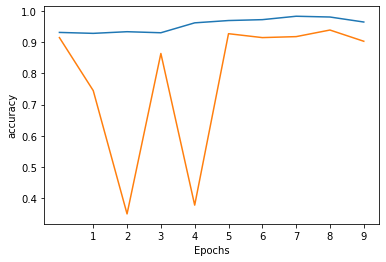

In [39]:
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.xticks(range(1,10))

In [40]:
history2.history['categorical_accuracy']

[0.9306338,
 0.92764086,
 0.93292254,
 0.92957747,
 0.9612676,
 0.96866196,
 0.9714789,
 0.98239434,
 0.97992957,
 0.96390843]

In [69]:

model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

In [70]:
history3 = model.fit(train, steps_per_epoch=5712//32, epochs=30, validation_data=test, validation_steps= 1311//32, callbacks=[model_es, model_rlr])

2023-01-02 08:38:02.303889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 138 of 179
2023-01-02 08:38:05.428946: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 178 steps, validate for 40 steps
Epoch 1/30


2023-01-02 08:38:17.275434: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 179
2023-01-02 08:38:19.957847: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 102s 572ms/step - loss: 0.7652 - categorical_accuracy: 0.7555 - val_loss: 4.6862 - val_categorical_accuracy: 0.2297
Epoch 2/30


2023-01-02 08:39:57.413225: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 179
2023-01-02 08:40:00.068999: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 95s 533ms/step - loss: 0.4230 - categorical_accuracy: 0.8400 - val_loss: 3.1384 - val_categorical_accuracy: 0.4133
Epoch 3/30


2023-01-02 08:41:32.307751: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 144 of 179
2023-01-02 08:41:34.990364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 93s 522ms/step - loss: 0.2957 - categorical_accuracy: 0.8923 - val_loss: 0.5220 - val_categorical_accuracy: 0.8219
Epoch 4/30


2023-01-02 08:43:05.217649: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2023-01-02 08:43:07.895350: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 519ms/step - loss: 0.2045 - categorical_accuracy: 0.9271 - val_loss: 0.2947 - val_categorical_accuracy: 0.8805
Epoch 5/30


2023-01-02 08:44:37.680819: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 137 of 179
2023-01-02 08:44:40.693206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 99s 557ms/step - loss: 0.1805 - categorical_accuracy: 0.9370 - val_loss: 0.2476 - val_categorical_accuracy: 0.9039
Epoch 6/30


2023-01-02 08:46:16.765094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 136 of 179
2023-01-02 08:46:19.868527: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 93s 525ms/step - loss: 0.1432 - categorical_accuracy: 0.9477 - val_loss: 0.1552 - val_categorical_accuracy: 0.9352
Epoch 7/30


2023-01-02 08:47:50.233526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 141 of 179
2023-01-02 08:47:53.007642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 94s 528ms/step - loss: 0.1030 - categorical_accuracy: 0.9660 - val_loss: 0.1532 - val_categorical_accuracy: 0.9523
Epoch 8/30


2023-01-02 08:49:24.174313: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 138 of 179
2023-01-02 08:49:27.133362: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 92s 518ms/step - loss: 0.0962 - categorical_accuracy: 0.9690 - val_loss: 0.2064 - val_categorical_accuracy: 0.9219
Epoch 9/30


2023-01-02 08:50:56.428006: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2023-01-02 08:50:59.089931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 94s 529ms/step - loss: 0.0750 - categorical_accuracy: 0.9736 - val_loss: 0.1273 - val_categorical_accuracy: 0.9586
Epoch 10/30


2023-01-02 08:52:30.636063: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2023-01-02 08:52:33.743798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 102s 573ms/step - loss: 0.0565 - categorical_accuracy: 0.9783 - val_loss: 0.1318 - val_categorical_accuracy: 0.9602
Epoch 11/30


2023-01-02 08:54:12.573703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 140 of 179
2023-01-02 08:54:15.439181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 91s 512ms/step - loss: 0.0629 - categorical_accuracy: 0.9794 - val_loss: 0.0980 - val_categorical_accuracy: 0.9680
Epoch 12/30


2023-01-02 08:55:43.759153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2023-01-02 08:55:46.425123: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 96s 539ms/step - loss: 0.0696 - categorical_accuracy: 0.9790 - val_loss: 0.0794 - val_categorical_accuracy: 0.9758
Epoch 13/30


2023-01-02 08:57:19.694277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 143 of 179
2023-01-02 08:57:22.351894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 99s 556ms/step - loss: 0.0389 - categorical_accuracy: 0.9875 - val_loss: 0.1041 - val_categorical_accuracy: 0.9688
Epoch 14/30


2023-01-02 08:58:58.588574: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 141 of 179
2023-01-02 08:59:01.392692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 97s 547ms/step - loss: 0.0525 - categorical_accuracy: 0.9852 - val_loss: 0.2315 - val_categorical_accuracy: 0.9320
Epoch 15/30


2023-01-02 09:00:35.964444: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 136 of 179
2023-01-02 09:00:39.450638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 104s 584ms/step - loss: 0.0449 - categorical_accuracy: 0.9854 - val_loss: 0.1182 - val_categorical_accuracy: 0.9719
Epoch 16/30


2023-01-02 09:02:19.816151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 179
2023-01-02 09:02:23.650766: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 108s 609ms/step - loss: 0.0304 - categorical_accuracy: 0.9907 - val_loss: 0.2031 - val_categorical_accuracy: 0.9422
Epoch 17/30


2023-01-02 09:04:08.244853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 179
2023-01-02 09:04:12.177715: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 112s 632ms/step - loss: 0.0312 - categorical_accuracy: 0.9903 - val_loss: 0.0905 - val_categorical_accuracy: 0.9656
Epoch 18/30


2023-01-02 09:06:00.739418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 134 of 179
2023-01-02 09:06:04.256876: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


177/178 [============================>.] - ETA: 0s - loss: 0.0297 - categorical_accuracy: 0.9896
Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
178/178 [==============================] - 102s 573ms/step - loss: 0.0299 - categorical_accuracy: 0.9894 - val_loss: 0.0983 - val_categorical_accuracy: 0.9703
Epoch 19/30


2023-01-02 09:07:42.636295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 136 of 179
2023-01-02 09:07:45.829354: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 101s 565ms/step - loss: 0.0132 - categorical_accuracy: 0.9963 - val_loss: 0.0643 - val_categorical_accuracy: 0.9836
Epoch 20/30


2023-01-02 09:09:23.195373: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 132 of 179
2023-01-02 09:09:27.444003: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 125s 705ms/step - loss: 0.0107 - categorical_accuracy: 0.9965 - val_loss: 0.0701 - val_categorical_accuracy: 0.9836
Epoch 21/30


2023-01-02 09:11:30.396981: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 179
2023-01-02 09:11:38.643450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 179
2023-01-02 09:11:44.826833: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 121s 680ms/step - loss: 0.0086 - categorical_accuracy: 0.9972 - val_loss: 0.0683 - val_categorical_accuracy: 0.9820
Epoch 22/30


2023-01-02 09:13:29.590330: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 133 of 179
2023-01-02 09:13:33.142880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 110s 620ms/step - loss: 0.0077 - categorical_accuracy: 0.9982 - val_loss: 0.0691 - val_categorical_accuracy: 0.9828
Epoch 23/30


2023-01-02 09:15:19.968510: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2023-01-02 09:15:23.010575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 99s 556ms/step - loss: 0.0062 - categorical_accuracy: 0.9981 - val_loss: 0.0604 - val_categorical_accuracy: 0.9875
Epoch 24/30


2023-01-02 09:16:58.893272: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 120 of 179
2023-01-02 09:17:03.478054: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 103s 577ms/step - loss: 0.0037 - categorical_accuracy: 0.9988 - val_loss: 0.0596 - val_categorical_accuracy: 0.9820
Epoch 25/30


2023-01-02 09:18:41.475032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2023-01-02 09:18:44.412816: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 94s 531ms/step - loss: 0.0039 - categorical_accuracy: 0.9989 - val_loss: 0.0579 - val_categorical_accuracy: 0.9828
Epoch 26/30


2023-01-02 09:20:15.958223: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 140 of 179
2023-01-02 09:20:18.903684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 96s 541ms/step - loss: 0.0054 - categorical_accuracy: 0.9981 - val_loss: 0.0430 - val_categorical_accuracy: 0.9883
Epoch 27/30


2023-01-02 09:21:52.257144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2023-01-02 09:21:55.192627: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 95s 535ms/step - loss: 0.0045 - categorical_accuracy: 0.9986 - val_loss: 0.0693 - val_categorical_accuracy: 0.9828
Epoch 28/30


2023-01-02 09:23:27.479217: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 139 of 179
2023-01-02 09:23:30.456682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 95s 535ms/step - loss: 0.0074 - categorical_accuracy: 0.9975 - val_loss: 0.0643 - val_categorical_accuracy: 0.9852
Epoch 29/30


2023-01-02 09:25:02.806266: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 140 of 179
2023-01-02 09:25:05.677273: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 96s 537ms/step - loss: 0.0049 - categorical_accuracy: 0.9981 - val_loss: 0.0703 - val_categorical_accuracy: 0.9836
Epoch 30/30


2023-01-02 09:26:38.384273: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 137 of 179
2023-01-02 09:26:41.454620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 106s 596ms/step - loss: 0.0041 - categorical_accuracy: 0.9982 - val_loss: 0.0743 - val_categorical_accuracy: 0.9797


([<matplotlib.axis.XTick at 0x7fb168843a10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

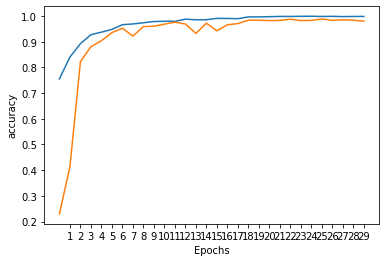

In [72]:
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.xticks(range(1,30))

In [73]:
history3.history['categorical_accuracy']

[0.75545776,
 0.8399648,
 0.8922535,
 0.9271127,
 0.93697184,
 0.9477113,
 0.9660211,
 0.9690141,
 0.97359157,
 0.9783451,
 0.9794014,
 0.9790493,
 0.9875,
 0.98521125,
 0.9853873,
 0.990669,
 0.9903169,
 0.9894366,
 0.99630284,
 0.99647886,
 0.9971831,
 0.99823946,
 0.9980634,
 0.9987676,
 0.9989437,
 0.9980634,
 0.99859154,
 0.9975352,
 0.9980634,
 0.99823946]

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [25]:
model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model2.add(Conv2D(128,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model2.add(Conv2D(256,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model2.add(Conv2D(512,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Flatten())

# Full connect layers

model2.add(Dense(units= 512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [26]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


In [27]:

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

In [29]:
train = generator_train.flow_from_directory('/Users/mayabridgman/Documents/mri-dataset/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/Users/mayabridgman/Documents/mri-dataset/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [32]:
model2_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model2_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)


history2 = model2.fit(train, steps_per_epoch=5712//32, epochs=10, validation_data=test, validation_steps= 1311//32,
                      callbacks=[model2_es, model2_rlr])

2022-12-28 22:30:16.042642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 137 of 179
2022-12-28 22:30:19.102719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 178 steps, validate for 40 steps
Epoch 1/10


2022-12-28 22:30:29.316913: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 142 of 179
2022-12-28 22:30:31.977863: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 1346s 8s/step - loss: 0.1998 - categorical_accuracy: 0.9306 - val_loss: 0.2329 - val_categorical_accuracy: 0.9141
Epoch 2/10


2022-12-28 22:52:55.578404: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 141 of 179
2022-12-28 22:52:58.394190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 99739s 560s/step - loss: 0.2145 - categorical_accuracy: 0.9276 - val_loss: 0.9062 - val_categorical_accuracy: 0.7445
Epoch 3/10
178/178 [==============================] - 4840s 27s/step - loss: 0.2018 - categorical_accuracy: 0.9329 - val_loss: 3.4569 - val_categorical_accuracy: 0.3500
Epoch 4/10
178/178 [==============================] - 2544s 14s/step - loss: 0.2072 - categorical_accuracy: 0.9296 - val_loss: 0.3358 - val_categorical_accuracy: 0.8633
Epoch 5/10
178/178 [==============================] - 14172s 80s/step - loss: 0.1172 - categorical_accuracy: 0.9613 - val_loss: 38.4240 - val_categorical_accuracy: 0.3781
Epoch 6/10


2022-12-30 04:50:33.242456: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 34 of 179
2022-12-30 04:50:33.308709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 35 of 179
2022-12-30 04:50:33.345808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 36 of 179
2022-12-30 04:50:33.394178: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 37 of 179
2022-12-30 04:50:33.439097: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 38 of 179
2022-12-30 04:50:33.491756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 39 of 179
2022-12-30 04:50:33.536923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this 

178/178 [==============================] - 15426s 87s/step - loss: 0.0888 - categorical_accuracy: 0.9687 - val_loss: 0.1813 - val_categorical_accuracy: 0.9266
Epoch 7/10
178/178 [==============================] - 9018s 51s/step - loss: 0.0887 - categorical_accuracy: 0.9715 - val_loss: 0.2194 - val_categorical_accuracy: 0.9141
Epoch 8/10
178/178 [==============================] - 10357s 58s/step - loss: 0.0524 - categorical_accuracy: 0.9824 - val_loss: 0.2399 - val_categorical_accuracy: 0.9172
Epoch 9/10


2022-12-30 14:14:31.373355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 131 of 179
2022-12-30 14:14:35.350911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 1328s 7s/step - loss: 0.0650 - categorical_accuracy: 0.9799 - val_loss: 0.1418 - val_categorical_accuracy: 0.9383
Epoch 10/10


2022-12-30 14:36:39.381290: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 141 of 179
2022-12-30 14:36:42.129167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


178/178 [==============================] - 1337s 8s/step - loss: 0.1387 - categorical_accuracy: 0.9639 - val_loss: 0.2933 - val_categorical_accuracy: 0.9023


In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       401536    
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)      

([<matplotlib.axis.XTick at 0x7fb128f40b90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

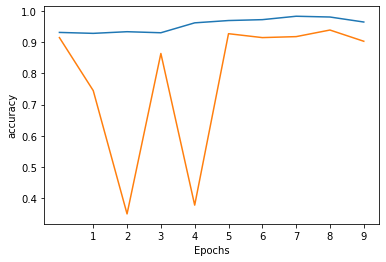

In [37]:
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.xticks(range(1,10))

In [35]:
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())

# Full connect layers

model3.add(Dense(units= 512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])